## Lifespan of a Freshwater Fish
In this exercise, the given dataset is trained using 4 regression algorithms - Multiple Linear Regression, Support Vecort Regression, Decision Tree and Random Forest Regressor. A model is built on the features of training data and the best preforming model is used to predict the dependent variable for new data.
We start by importing the libraries and the dataset.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import seaborn as sns

In [63]:
#Changing the working directory
os.chdir("C:/Users/sabir/OneDrive/Desktop/Job/Job Search/Adobe/Intern_Test")

In [64]:
df = pd.read_csv('intern_data.csv')

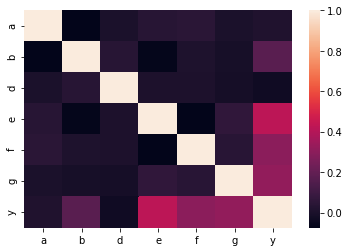

In [65]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
sns.heatmap(df.corr())

This correlation plot depicts the relationship between the variables. The highest correlation is 0.42, between y and e.

In [66]:
Y = df['y'].values
df.drop(['y'], axis=1, inplace=True)
df.head()

,a,b,c,d,e,f,g,h
0,0.951786,0.669570,green,0.170130,0.623469,0.925886,0.812685,white
1,0.510447,0.922627,red,0.087899,0.025415,0.698444,0.658545,white
2,0.294838,0.351081,yellow,0.710892,0.699661,0.545722,0.836863,black
3,0.798645,0.572042,green,0.026137,0.609730,0.488668,0.342675,black
4,0.689666,0.395323,red,0.172448,0.736433,0.708408,0.695521,white


In [67]:
test = pd.read_csv('intern_test.csv')
test = test.loc[:, ~test.columns.str.contains('^Unnamed')]

### One Hot Encoding
This data-preprocessing technique is used to work with categorial features in columns 'c' and 'h'. It creates new binary columns for each possible categorial value in the dataset.

In [68]:
categorical_cols = ['c', 'h']
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols), remainder='passthrough')

test_column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols), remainder='passthrough')
X_test = test_column_trans.fit_transform(test)

### MULTIPLE LINEAR REGRESSION
    The multiple linear regression algorithm models the relationship between the independent and dependent variables by
    fitting a linear equation to the observed data. 

In [69]:
X_lr = column_trans.fit_transform(df)

We now building a multiple linear regressor by creating an object of the classs LinearRegression and fit it to our training data.

In [70]:
from sklearn.linear_model import LinearRegression
regressor_lr = LinearRegression(copy_X = 'True', fit_intercept= 'True', normalize= 'True',n_jobs =-1)
regressor_lr.fit(X_lr,Y)

LinearRegression(copy_X='True', fit_intercept='True', n_jobs=-1,
                 normalize='True')

### K-fold Cross Validation
The data set is split into k number of sections/folds. Holding out one of the folds at a time, the model is trained on the remaining k-1 folds to make a prediction for the held-out fold. The regression model is then evaluated by calculating the accuracies. In this case, k = 10.

In [71]:
accuracies_lr = cross_val_score(estimator=regressor_lr, X= X_lr, y=Y, cv = 10, n_jobs=-1)
m_lr= accuracies_lr.mean()     #0.970
print (m_lr)
s_lr = accuracies_lr.std()
print (s_lr)
y_pred_lr = regressor_lr.predict(X_lr)

0.970519687345816
0.009063451352197625


The accuracy of the model is the average R squared coefficient value for each fold. For this model, the average R squared value is **0.9704**. 

### Hyperparameter Tuning
The model is optimized by tuning the hyper-parameters. The performance of the enitre model is based on the hyper parameter values specified. The best set of hyper parameter values chosen in the grid search are used in the actual model.

In [72]:
from sklearn.model_selection import GridSearchCV
clf_lr = GridSearchCV(LinearRegression(n_jobs=-1),{
        'fit_intercept' : ['True','False'],
        'normalize' : ['True','False'],
        'copy_X' : ['True','False'],
        
        }, cv=5, return_train_score = False)
    
clf_lr.fit(X_lr,Y)
print(clf_lr.best_params_)
df_results = pd.DataFrame(clf_lr.cv_results_)

{'copy_X': 'True', 'fit_intercept': 'True', 'normalize': 'True'}


### Backward Elimination
A new matrix of optimal features is created using the ordinary least squares class(OLS). The arguments endog is the dependent variable and exog in the matrix of features. 

In [99]:
import statsmodels.api as sm 
X_lr = np.append(arr=np.ones((500,1)).astype(int), values= X_lr, axis =1) #does not include the constant b0, so add a column of 1
X_optimal = X_lr[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]] 
regressor_OLS = sm.OLS(endog=Y,exog=X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1775.
Date:                Sat, 01 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:54:08   Log-Likelihood:                 457.50
No. Observations:                 500   AIC:                            -893.0
Df Residuals:                     489   BIC:                            -846.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6643      0.011     58.701      0.000       0.642       0.686
x1            -0.4204      0.008    -50.225      0.000      -0.437      -0.404
x2             0.4822      0.008     59.927      0.000       0.466       0.498
x3             0.1446      0.008     17.724      0.000       0.129       0.161
x4             0.4578      0.008     56.739      0.000       0.442       0.474
x5             0.0153      0.008      1.847      0.065      -0.001       0.032
x6             0.6490      0.007     89.317      0.000       0.635       0.663
x7            -0.0073      0.015     -0.485      0.628      -0.037       0.022
x8             0.3919      0.015     25.872      0.000       0.362       0.422
x9             0.0013      0.016      0.085      0.932      -0.029       0.032
x10            0.9517      0.016     58.083      0.000       0.919       0.984
x11            0.6718      0.015     44.425      0.000       0.642       0.702
x12            0.6033      0.015     38.930      0.000       0.573       0.634
==============================================================================
Omnibus:                        4.748   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.093   Jarque-Bera (JB):                4.533
Skew:                          -0.220   Prob(JB):                        0.104
Kurtosis:                       3.156   Cond. No.                     1.22e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.17e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

From the summary, we see the adjusted R-squared and p-values. The lower the p-value, the more significant is the independent variable to the dependent variable. So, we remove index 9 as it has the highest p-value (0.932). The process is repeated.

In [100]:
X_optimal = X_lr[:,[0,1,2,3,4,6,7,8,10,11,12]] 
regressor_OLS = sm.OLS(endog=Y,exog=X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     1977.
Date:                Sat, 01 Feb 2020   Prob (F-statistic):               0.00
Time:                        17:54:13   Log-Likelihood:                 457.50
No. Observations:                 500   AIC:                            -895.0
Df Residuals:                     490   BIC:                            -852.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6770      0.016     42.861      0.000       0.646       0.708
x1            -0.4172      0.009    -47.706      0.000      -0.434      -0.400
x2             0.4854      0.009     56.621      0.000       0.469       0.502
x3             0.1478      0.009     17.148      0.000       0.131       0.165
x4             0.4610      0.008     54.583      0.000       0.444       0.478
x5             0.6336      0.011     59.217      0.000       0.613       0.655
x6            -0.0073      0.015     -0.485      0.628      -0.037       0.022
x7             0.3919      0.015     25.922      0.000       0.362       0.422
x8             0.9516      0.016     58.142      0.000       0.919       0.984
x9             0.6718      0.015     44.471      0.000       0.642       0.702
x10            0.6032      0.015     38.973      0.000       0.573       0.634
==============================================================================
Omnibus:                        4.734   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.519
Skew:                          -0.219   Prob(JB):                        0.104
Kurtosis:                       3.156   Cond. No.                     5.05e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.31e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

This process is repeated till there are no p-values that are higher than the significance level chosen. In this case, SL=0.5

In [61]:
X_optimal = X_lr[:,[0,1,2,3,4,5,8,10,11,12]] 
regressor_OLS = sm.OLS(endog=Y,exog=X_optimal).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     2227.
Date:                Sat, 01 Feb 2020   Prob (F-statistic):               0.00
Time:                        14:00:52   Log-Likelihood:                 457.38
No. Observations:                 500   AIC:                            -896.8
Df Residuals:                     491   BIC:                            -858.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1811      0.013     88.040      0.000       1.155       1.207
x1            -0.2911      0.008    -34.327      0.000      -0.308      -0.274
x2             0.6115      0.008     74.578      0.000       0.595       0.628
x3             0.2739      0.008     32.574      0.000       0.257       0.290
x4             0.5869      0.008     71.268      0.000       0.571       0.603
x5            -0.6338      0.011    -59.294      0.000      -0.655      -0.613
x6             0.3925      0.015     26.052      0.000       0.363       0.422
x7             0.9514      0.016     58.200      0.000       0.919       0.984
x8             0.6715      0.015     44.538      0.000       0.642       0.701
x9             0.6032      0.015     39.002      0.000       0.573       0.634
==============================================================================
Omnibus:                        4.730   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.094   Jarque-Bera (JB):                4.513
Skew:                          -0.218   Prob(JB):                        0.105
Kurtosis:                       3.163   Cond. No.                     4.16e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

All p-values are less than SL, so X_lr[:,[0,1,2,3,4,5,8,10,11,12]]  is the optimized matrix. Indexes 6,7 and 9 have minimal effect on the dependent variable.

In [43]:
y_pred = regressor_lr.predict(X_lr)

### Plotting the actual values vs the fitted values

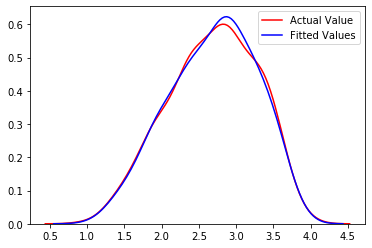

In [44]:
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

### SUPPORT VECTOR REGRESSION
The model is built by trying to fit the error within a certain threshold using support vectors and the hyper plane.

In [45]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols), remainder='passthrough')
X_svr = column_trans.fit_transform(df)

In [46]:
from sklearn.svm import SVR
regressor_svr = SVR(C=1,kernel='linear') 
regressor_svr.fit(X_svr,Y)

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='linear', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

### k-fold cross validation

In [47]:
accuracies_svr = cross_val_score(estimator=regressor_svr, X= X_svr, y=Y, cv = 10, n_jobs=-1)
m_svr = accuracies_svr.mean()    #0.970
print (m_svr)
s_svr = accuracies_svr.std()
print (s_svr)

0.9702140051480381
0.009099664598368681


The mean R squared value of the 10 folds for the SVR model is **0.9702**.

### Hyper-parameter tuning

In [50]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVR(gamma='auto'),{
        'C' : [1,10,20],
        'kernel' : ['rbf','linear']
}, cv=5, return_train_score = False)
    
clf.fit(X_svr,Y)
print(clf.best_params_)


{'C': 1, 'kernel': 'linear'}


These set of hyper parameter values from the grid search are used in the actual model to give the most optimized result.

In [51]:
y_pred = regressor_svr.predict(X_svr)

### Plotting the actual values vs fitted values

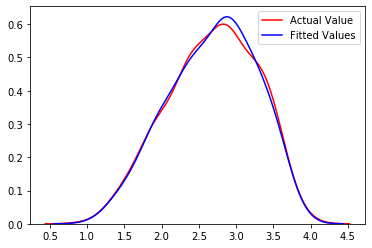

In [52]:
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

### DECISION TREE
The decision tree algorithm builds the regression model in the form of a tree structure. It breaks the dataset into smaller and smaller subsets. The final subsets are called terminal or leaf nodes. To predict the outcome in each leaf node, the average outcome of training data in this node is used. 

In [53]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols), remainder='passthrough') #non-strings
X_dt = column_trans.fit_transform(df)

In [54]:
regressor_dt = DecisionTreeRegressor(max_depth=20,min_samples_leaf=5,min_samples_split=10, random_state=0)
regressor_dt.fit(X_dt,Y)

DecisionTreeRegressor(criterion='mse', max_depth=20, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=5,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

### k-fold Cross Validation

In [55]:
accuracies = cross_val_score(estimator=regressor_dt, X= X_dt, y=Y, cv = 10, n_jobs=-1)
m = accuracies.mean()
print (m)    #0.788
s = accuracies.std()
print (s)

0.7881196076022543
0.06365466114848559


The mean R squared value of the 10 folds for the decision tree model is **0.788**.

### Hyper-parameter tuning

In [56]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(DecisionTreeRegressor(random_state=0),{
        'min_samples_leaf' : [1,5,10,20],
        'min_samples_split' : [10,50,20],
        'max_depth' : [1,20,2]
        }, cv=5, return_train_score = False)
    
clf.fit(X_dt,Y)
clf.cv_results_
print(clf.best_params_)

{'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10}


These set of hyper parameter values from the grid search are used in the actual model to give the most optimized result.

In [58]:
y_pred = regressor_dt.predict(X_dt)

### Plotting the actual values vs fitted values

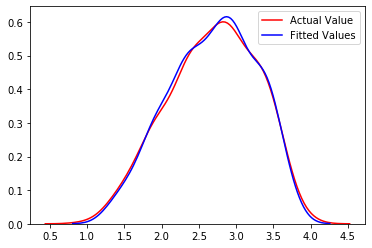

In [59]:
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

### RANDOM FOREST
Random forest is an ensemble technique which aggregates many decision trees and combines their results.

In [30]:
column_trans = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_cols), remainder='passthrough') #non-strings
X_rf = column_trans.fit_transform(df)

The n_estimators determines the number of decision trees being aggregated. In this case, 600 decision trees are used to give the most optimal results!

In [33]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(max_features='auto',min_samples_leaf=2, min_samples_split=5,n_estimators = 20, random_state=0)
model = regressor.fit(X_rf,Y) 

### k-fold Cross Validation

In [34]:
accuracies = cross_val_score(estimator=regressor, X= X_rf, y=Y, cv = 10, n_jobs=-1)
m = accuracies.mean()   
print (m)
s = accuracies.std()
print (s)

0.8821106318554535
0.018558690349625047


The mean R squared value of the 10 folds for the random forest model is **0.882**.

### Hyper-parameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(RandomForestRegressor(random_state=0),{
        'n_estimators' : [10,20,20],
        'min_samples_split' : [2,5,10],
        'max_features' : ['auto','sqrt'],
        'min_samples_leaf' : [1,2,4]
        }, cv=5, return_train_score = False)
    
clf.fit(X_rf,Y)
clf.best_params_


{'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 20}

These set of hyper parameter values from the grid search are used in the actual model to give the most optimized result

In [ ]:
y_pred = regressor.predict(X_rf)

### Plotting the actual values vs fitted values

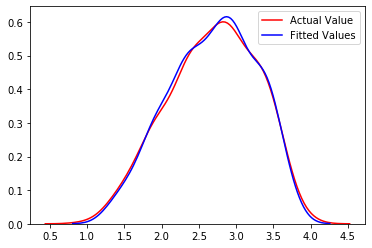

In [60]:
ax1 = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax1)

## INFERENCE
Comparing the R squared values of the above models, we see that the **multiple linear regression model** has the best performance. This is probably because the other models are unable to find good non-linear boundaries with just 500 datapoints.
The benefits of non-linear approches are seen only when data is large and diverse. This also proves why SVR performs better when the kernel hyperparmeter is set to 'linear'. 

Now, we predict the dependent variable on test data using the multiple linear regressor. 

In [81]:
y = regressor_lr.predict(X_test)
test.index = np.arange(1,len(test)+1) 
test.index.names =['i']
test['y'] = y
test.head()
#print(test)

,a,b,c,d,e,f,g,h,y
i,,,,,,,,,
1,0.213254,0.707218,green,0.206151,0.010148,0.190193,0.497651,black,1.878906
2,0.867987,0.494110,green,0.510344,0.922549,0.649631,0.952224,black,3.242188
3,0.419168,0.579660,yellow,0.832660,0.351641,0.105251,0.277489,white,2.564453
4,0.706512,0.948891,blue,0.546916,0.771624,0.683572,0.311848,white,2.638672
5,0.344634,0.942960,yellow,0.570995,0.315698,0.651284,0.677366,white,3.283203


## Further insights can be seen from the following data visualization in Tableau:
https://public.tableau.com/shared/4T34J5DGT?:display_count=y&:origin=viz_share_link